# 데이터 시각화 연습문제 (3) - seaborn 막대, 빈도 그래프

다음의 데이터는 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터의 일부이다.

| id | manufacturer | model | displ | year | cyl | trans      | drv | cty | hwy | fl | class   |
|----|--------------|-------|-------|------|-----|------------|-----|-----|-----|----|---------|
| 1  | audi         | a4    | 1.8   | 1999 | 4   | auto(l5)   | f   | 18  | 29  | p  | compact |
| 2  | audi         | a4    | 1.8   | 1999 | 4   | manual(m5) | f   | 21  | 29  | p  | compact |
| 3  | audi         | a4    | 2     | 2008 | 4   | manual(m6) | f   | 20  | 31  | p  | compact |
| 4  | audi         | a4    | 2     | 2008 | 4   | auto(av)   | f   | 21  | 30  | p  | compact |
| 5  | audi         | a4    | 2.8   | 1999 | 6   | auto(l5)   | f   | 16  | 26  | p  | compact |

전체 데이터는 아래의 URL을 통해 확인할 수 있다.

> https://data.hossam.kr/D01/mpg.xlsx

데이터는 234 개의 행이 있으며, 각 행은 다음과 같은 변수로 구성되어 있다.

| 변수 | 설명 |
|--|--|
| manufacturer | 자동차 제조사 |
| model | 자동차 모델명 |
| displ | 자동차 배기량 |
| year | 제조년도 |
| cyl | 엔진 실린더 수 |
| trans | 자동차 트랜스미션 종류 |
| drv | 자동차 구동 방식. f=전륜구동, r=후륜구동, 4=사륜구동 |
| cty | 도심 연비 (마일/갤론) |
| hwy | 고속도로 연비 (마일/갤론) |
| fl | 연료 종류 |
| class | 자동차 분류 |

## 문제1
자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

## 문제2
자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

## 문제3
구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.

## 문제4
자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

## 문제5
자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

## 문제6
배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다.
서브플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.


In [4]:
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from pandas import read_excel
import seaborn as sb
import numpy as np

In [5]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

In [6]:
# 빈도그래프를 사용할 때는 카테고리화 시키는게 좋지만, 안해도 되긴 한다. 
car = read_excel("https://data.hossam.kr/D01/mpg.xlsx", index_col="id")
car = car.astype({'manufacturer': 'category', 'model': 'category', 'year': 'category',
                    'cyl': 'category', 'trans': 'category', 'drv': 'category',
                    'fl': 'category', 'class': 'category','cty':'int'})
#car.head()
car.dtypes

manufacturer    category
model           category
displ            float64
year            category
cyl             category
trans           category
drv             category
cty                int32
hwy                int64
fl              category
class           category
dtype: object

##### 문제1 
자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

In [7]:
# catplot을 활용한 방법
g = sb.catplot(data=df, x='manufacturer', kind='count')

g.fig.set_figwidth(15)
g.fig.set_figheight(5)

plt.title("제조사별 자동차 모델 수")
plt.show()
plt.close()

NameError: name 'df' is not defined

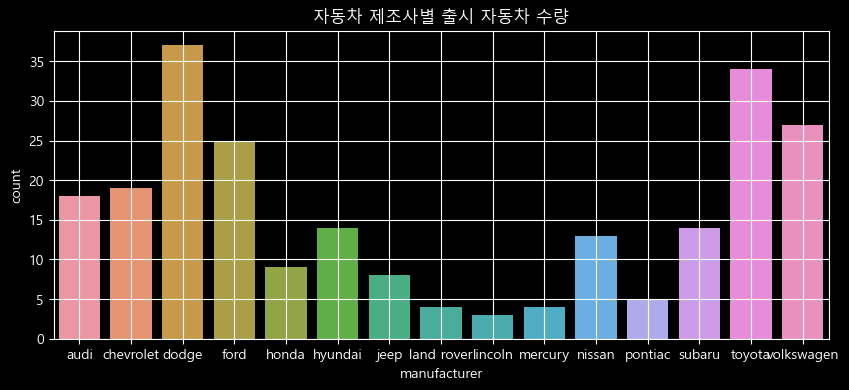

In [ ]:
# countplot을 활용한 방법 
sb.countplot(data=car,x="manufacturer")
plt.title('자동차 제조사별 출시 자동차 수량')
plt.grid()
plt.show()
plt.close()

##### 문제2
자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

In [ ]:
# catplot을 활용한 방법
g = sb.catplot(data=df, x='manufacturer', kind='count', hue='year')

g.fig.set_figwidth(15)
g.fig.set_figheight(5)

plt.title("제조사별 자동차 모델 수")
plt.show()
plt.close()

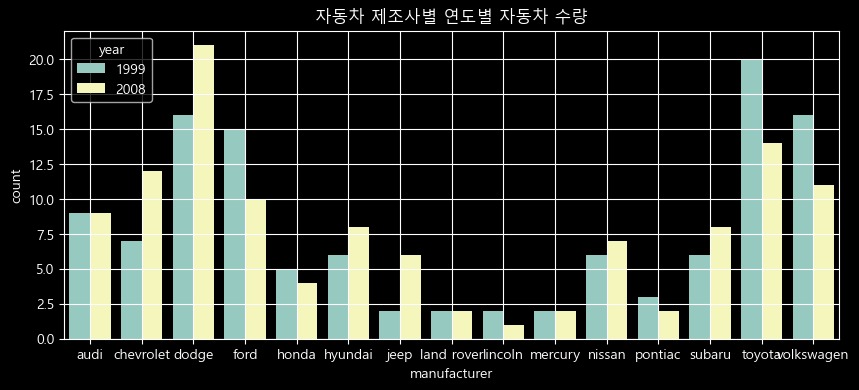

In [ ]:
# countplot을 활용한 방법 
sb.countplot(data=car,x="manufacturer",hue='year')
plt.title('자동차 제조사별 연도별 자동차 수량')
plt.grid()
plt.show()
plt.close()

## 문제3
구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.
drv | 자동차 구동 방식. f=전륜구동, r=후륜구동, 4=사륜구동

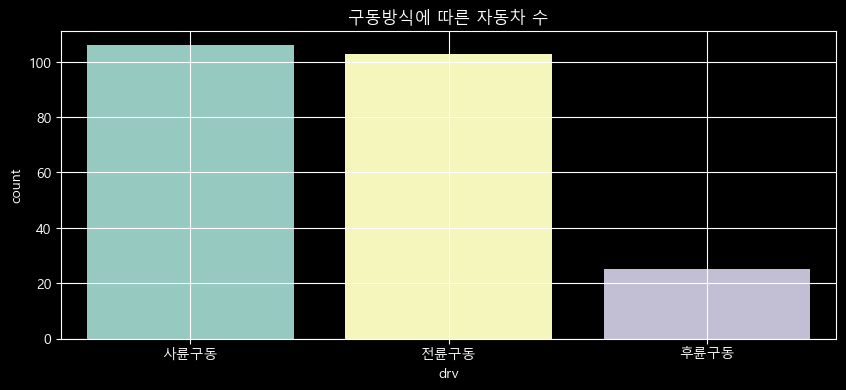

In [ ]:
sb.countplot(data=car,x="drv")
plt.title('구동방식에 따른 자동차 수')
plt.xticks([0,1,2],['사륜구동','전륜구동','후륜구동']) # barplot에서 x좌표는 무조건 0부터 시작한다.[0,1,2..]로 하는 이유
plt.grid()
plt.show()
plt.close()

## 문제4
자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

#### 평균 막대 그래프는 barplot 연산 규칙을 안 잡아주면 기본이 평균이다

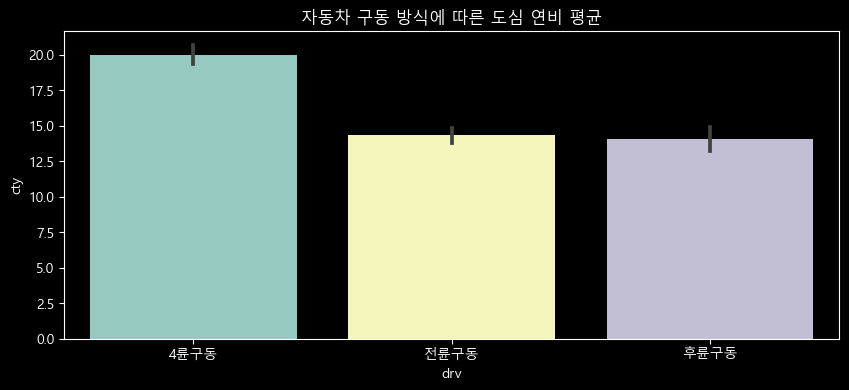

In [ ]:
plt.rcParams["figure.figsize"] = (10, 4)
sb.barplot(data=car,x='drv',y='cty',estimator='mean') # 평균은 mean
plt.title('자동차 구동 방식에 따른 도심 연비 평균')
plt.xticks([0,1,2],['4륜구동','전륜구동','후륜구동'])
plt.show()
plt.close()

## 문제5
자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

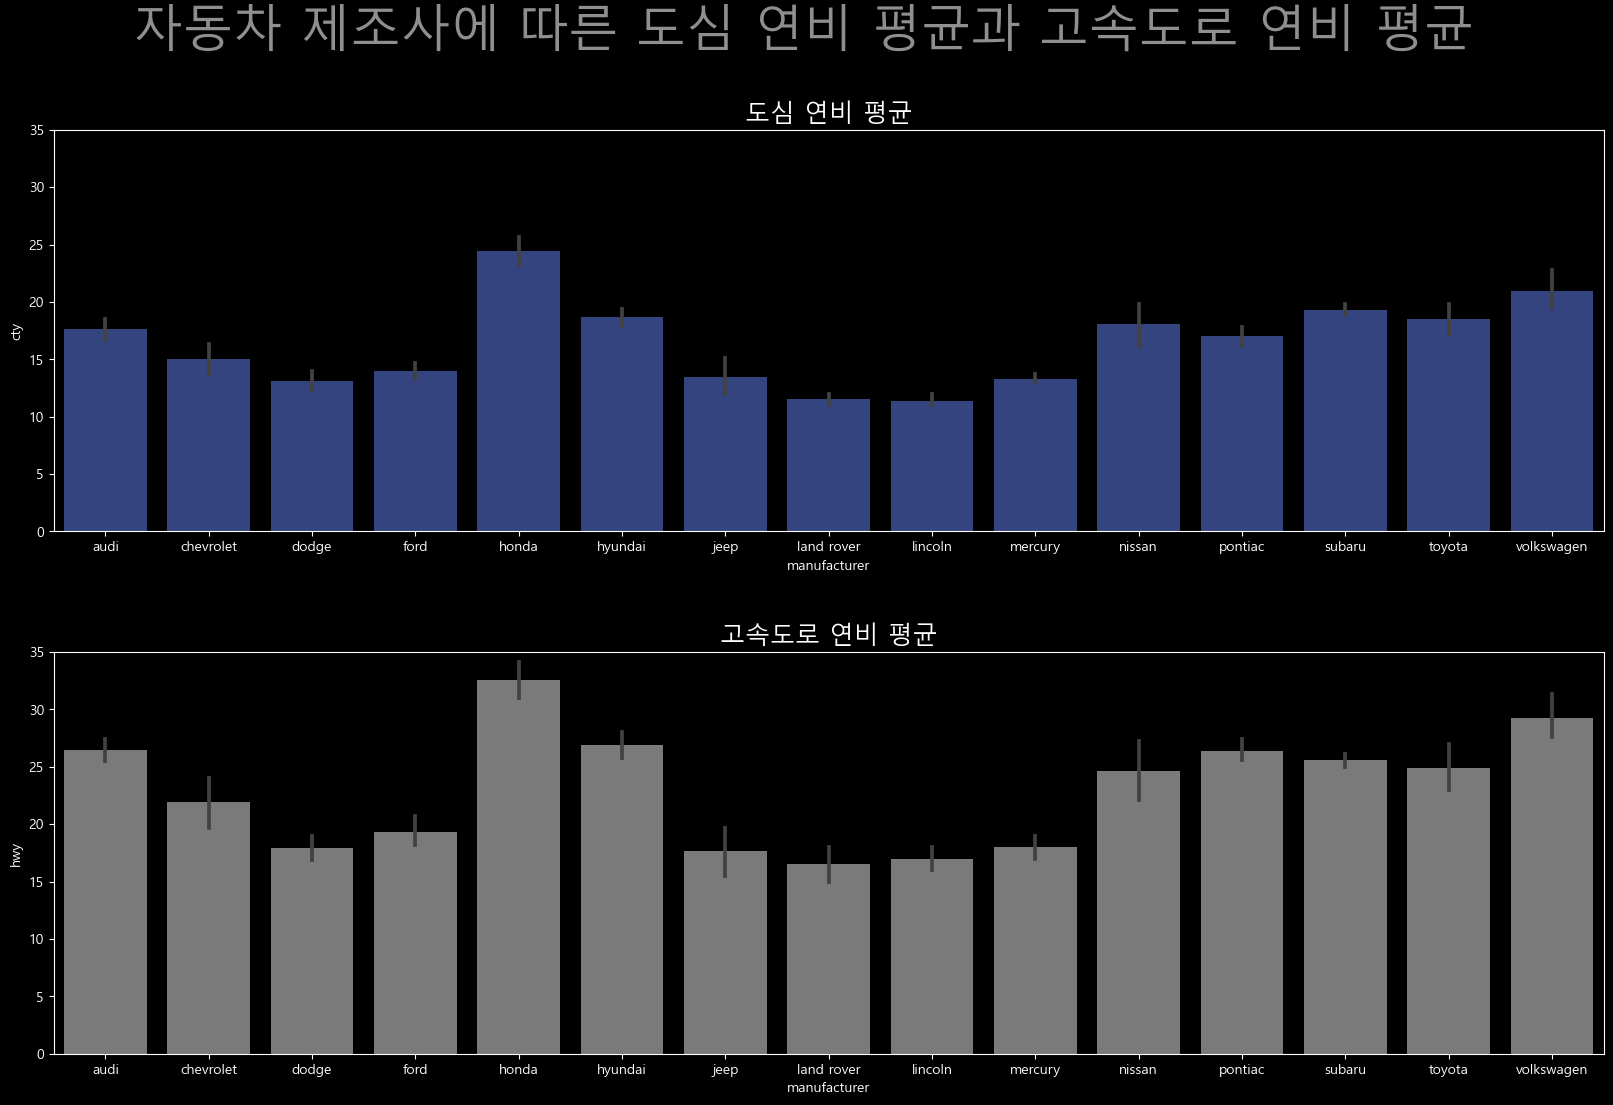

In [ ]:
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(20, 12))
fig.suptitle('자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균', fontsize=36, color='#8f8f8f')
fig.subplots_adjust(wspace=0.2, hspace=0.3)

sb.barplot(data=car, x='manufacturer', y='cty', color="#273d8c", ax=ax1_left)
ax1_left.set_title('도심 연비 평균', fontsize=18)
ax1_left.set_ylim(0, 35) 

sb.barplot(data=car, x='manufacturer', y='hwy', color="#7a7a7a", ax=ax2_left)
ax2_left.set_title('고속도로 연비 평균', fontsize=18)
ax2_left.set_ylim(0, 35) 

plt.show()
plt.close()

## 문제6
배기량(displ)과 도심연비(cty), 배기량과 고속도로 연비(hwy)의 상관관계를 확인하고자 한다.
서브플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.

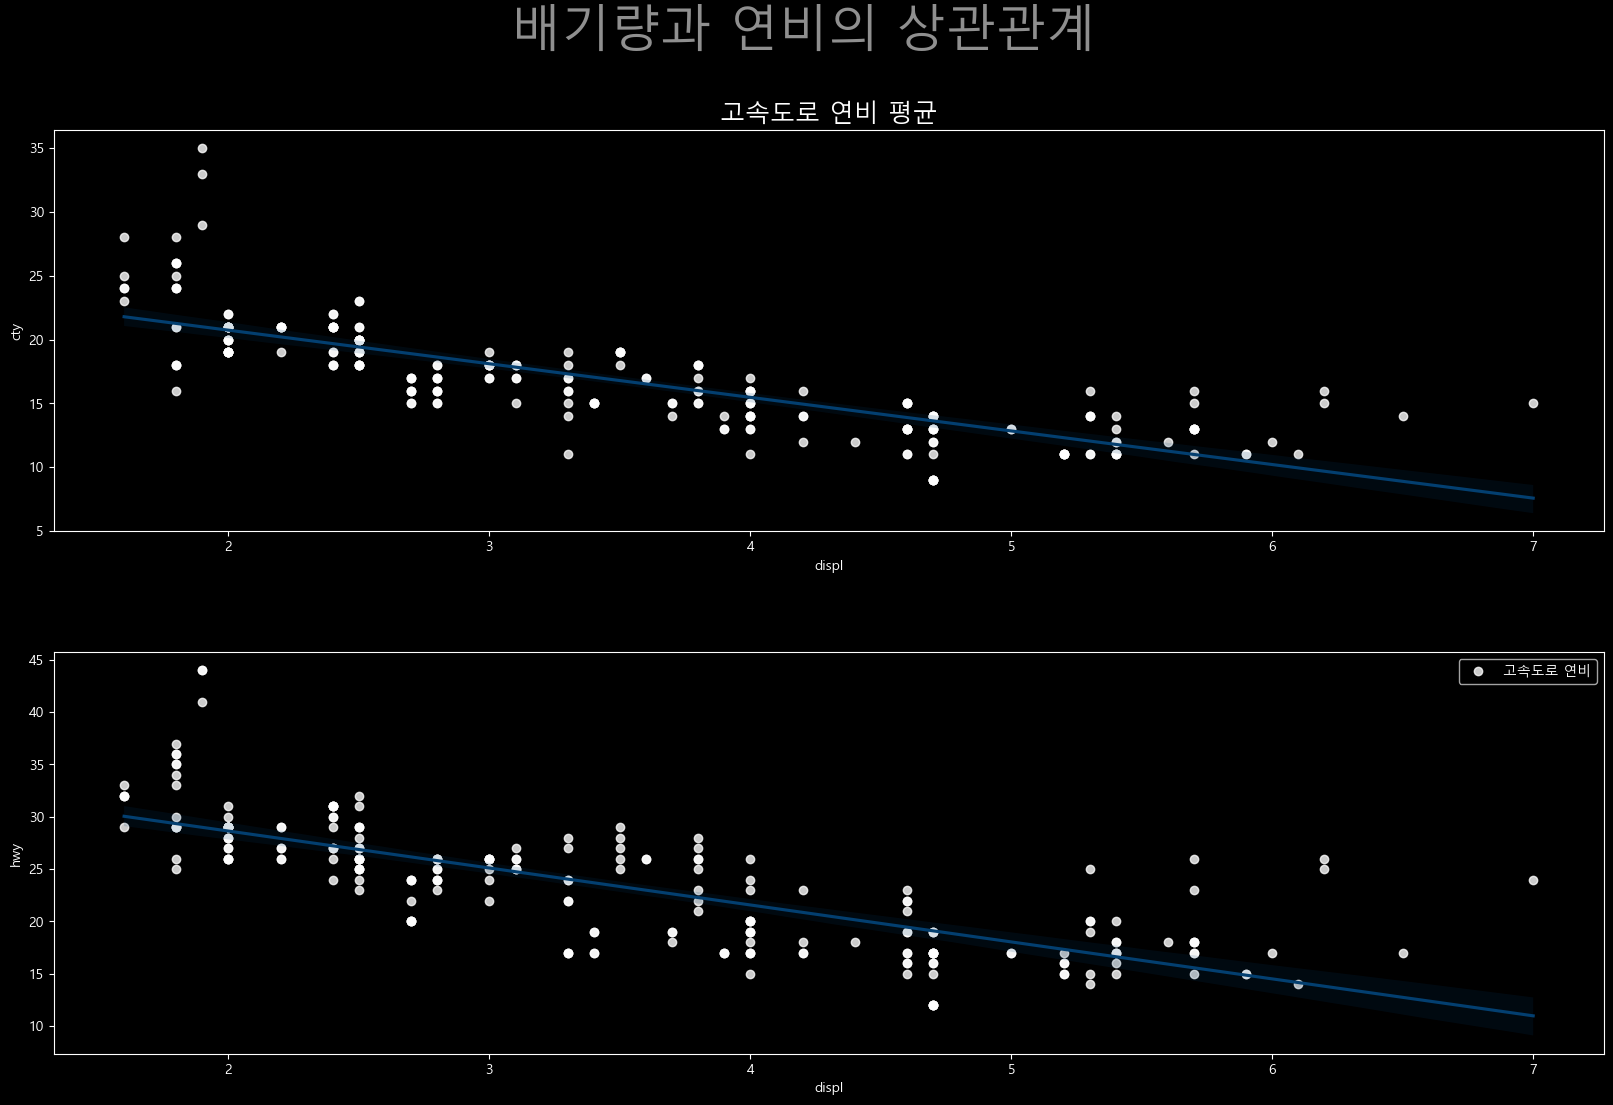

In [ ]:
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(20, 12))
fig.suptitle('배기량과 연비의 상관관계', fontsize=36, color='#8f8f8f')
fig.subplots_adjust(wspace=0.2, hspace=0.3)

sb.regplot(data=car,x='displ',y='cty',label='도심 연비',line_kws={'color':'#033f70'},scatter_kws={'color':'white'},ax=ax1_left)
ax1_left.set_title('도심 연비 평균', fontsize=18)
sb.regplot(data=car,x='displ',y='hwy',label='고속도로 연비',line_kws={'color':'#033f70'},scatter_kws={'color':'white'},ax=ax2_left)
ax1_left.set_title('고속도로 연비 평균', fontsize=18)

plt.legend()
plt.show()
plt.close()

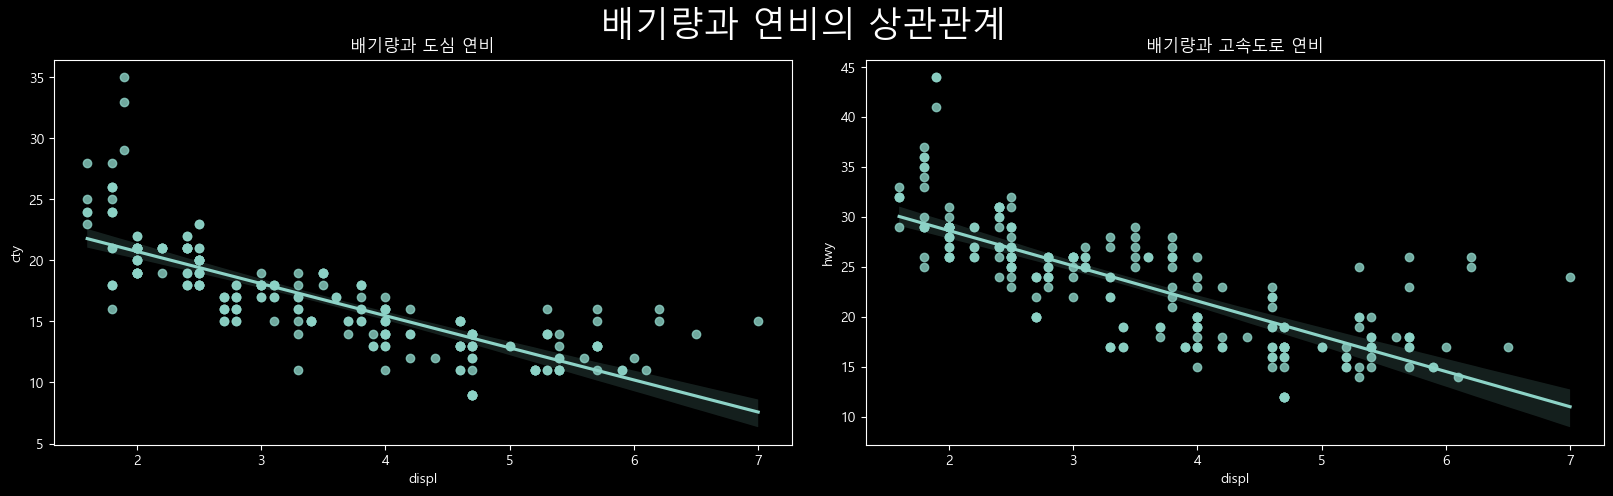

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

fig.subplots_adjust(wspace=0.1)

fig.suptitle('배기량과 연비의 상관관계', fontsize=25)

sb.regplot(data=car, x='displ', y='cty', ax=ax1)
sb.regplot(data=car, x='displ', y='hwy', ax=ax2)

ax1.title.set_text("배기량과 도심 연비")
ax2.title.set_text("배기량과 고속도로 연비")

plt.show()
plt.close()

문제7
철수는 새로 자동차를 구입하고자 한다. 좋은 자동차를 구입하는데 있어서 가장 중요시 되는 조건은 평균연비이다.

데이터 전처리 요구사항
데이터 프레임에 평균연비에 대한 파생변수를 생성하시오.
전체 평균연비에 대한 평균값을 구하고 이 평균값보다 평균연비가 높은 경우 'Pass', 그렇지 않을 경우 'Fail'로 표시할 수 있는 파생변수를 평가라는 이름으로 추가하시오.
평균연비에 대한 백분율을 구한 후 90점 이상일 경우 A, 80점 이상일 경우 B, 70점 이상일 경우 C, 그 외의 경우는 D로 하여 등급이라는 컬럼을 추가하시오.
다음의 네가지 지표를 확인할 수 있는 서브플롯을 제시하라

자동차 구동방식별 평가에 대한 빈도
자동차 구동방식별 등급에 대한 빈도
자동차 연료 종류 평가에 대한 빈도
자동차 연료 종류 등급에 대한 빈도
자동차 분류별 평가에 대한 빈도
자동차 분류별 등급에 대한 빈도


cty,hwy 평균 구하기
평균들의 평균 구하기 = 변수
평가 / 등급 만들어서 평가는 변수보다 낮으면 f,높으면 p, 
등급은 백분율로 만들어서 90/80.. abc 그외는 D로 만들기

자동차 구동방식별 평가/등급 빈도
자동차 연료 종류 평가/등급 빈도
자동차 분류별 

In [9]:
car

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize


In [10]:
car1 = car.copy()
car1['avg'] = car1.loc[:,'cty':'hwy'].mean(axis=1)
car1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg
id,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0


In [11]:
# 평균 값 구하기 
avg_avg = car1['avg'].mean()
avg_avg

20.14957264957265

In [12]:
# 패스/패일 확인하기 
car1['P/F'] = np.where(car1['avg']>=avg_avg,'Pass','Fail')
car1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg,P/F
id,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass


In [13]:
max_avg = car1['avg'].max()
max_avg

# 평균 합 
sum_avg = car1['avg'].sum()
sum_avg

4715.0

In [17]:
평균합 = car1['avg'].sum()
car1['연비효율'] = car1['avg'] / avg_avg * 100
car1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg,P/F,백분율,grade,연비효율
id,,,,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass,59.493671,D,116.627784
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass,63.291139,D,124.072110
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass,64.556962,D,126.553552
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass,64.556962,D,126.553552
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass,53.164557,D,104.220573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass,59.493671,D,116.627784
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass,63.291139,D,124.072110
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass,53.164557,D,104.220573


In [14]:
# # 백분율 구하기 
# car1['백분율'] = car1.loc[:,'cty':'hwy'].mean(axis=1)/max_avg * 100.0
# car1


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg,P/F,백분율
id,,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass,59.493671
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass,63.291139
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass,64.556962
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass,64.556962
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass,53.164557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass,59.493671
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass,63.291139
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass,53.164557


In [18]:
condition = [(car1['연비효율'] > 90),
             (car1['연비효율'] > 80),
             (car1['연비효율'] > 70),]
value = ['A','B','C']
car1['grade'] = np.select(condition,value,default='D')
car1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg,P/F,백분율,grade,연비효율
id,,,,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass,59.493671,A,116.627784
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass,63.291139,A,124.072110
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass,64.556962,A,126.553552
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass,64.556962,A,126.553552
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass,53.164557,A,104.220573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass,59.493671,A,116.627784
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass,63.291139,A,124.072110
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass,53.164557,A,104.220573


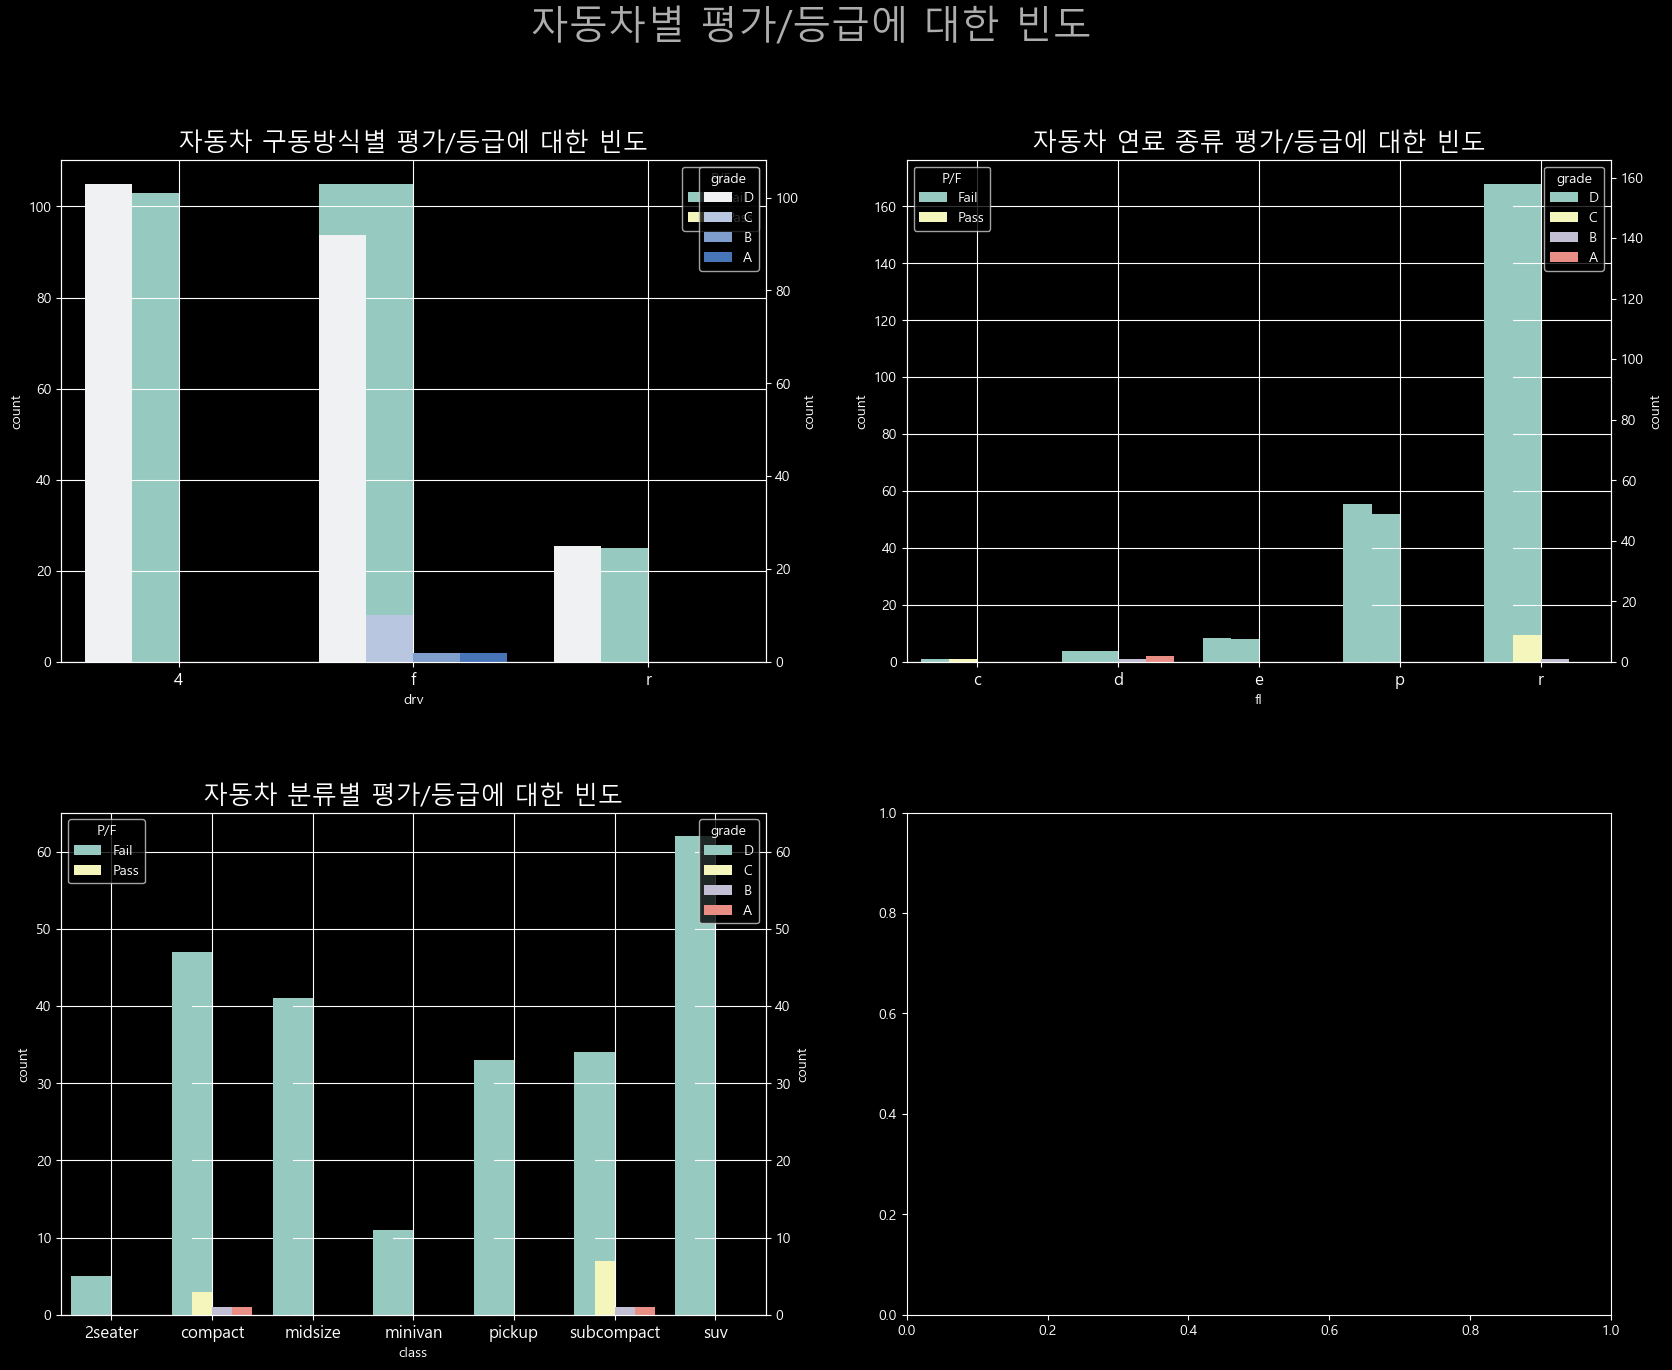

In [ ]:
# 2행2열 서브플롯
fig, ((ax1_left, ax2_left), (ax3_left, ax4_right)) = plt.subplots(2, 2, figsize=(20, 15))

# 각 서브플롯별로 twinx 생성
ax1_right = ax1_left.twinx()
ax2_right = ax2_left.twinx() 
ax3_right = ax3_left.twinx()
#ax4_right = ax4_left.twinx() 

# 전체 제목
fig.suptitle('자동차별 평가/등급에 대한 빈도', fontsize=28, color='#adadad')

# 각 그래프 간의 세로(hspace) 간격 지정
fig.subplots_adjust(hspace=0.3)

# # -----------------------------------------------------------------------------

# 1 자동차 구동방식별(drv) 평가/등급에 대한 빈도
x = list(range(0, len(car['drv'])))
xticks = []
for i in car['drv']:
    xticks.append(i)
sb.countplot(data=car1,x='drv',hue='P/F', ax=ax1_left)
ax1_left.grid()
ax1_left.set_title('자동차 구동방식별 평가/등급에 대한 빈도', fontsize=18)
#ax1_left.set_ylim(0, 415000) 
ax1_left.set_xticks(x)
ax1_left.set_xticklabels(xticks, fontsize=12, rotation=0)
sb.countplot(data=car1, x='drv',hue='grade', color="#3471CB", ax=ax1_right)
#plt.xticks([0,1,2],['4륜구동','전륜구동','후륜구동'])


# # # ------------------------------------------------------------------------------

# 자동차 연료 종류 평가/등급에 대한 빈도
x = list(range(0, len(car['fl'])))
xticks = []
for i in car['fl']:
    xticks.append(i)
sb.countplot(data=car1,x='fl',hue='P/F', ax=ax2_left)
ax2_left.grid()
ax2_left.set_title('자동차 연료 종류 평가/등급에 대한 빈도', fontsize=18)
#ax1_left.set_ylim(0, 415000) 
ax2_left.set_xticks(x)
ax2_left.set_xticklabels(xticks, fontsize=12, rotation=0)
sb.countplot(data=car1, x='fl',hue='grade', ax=ax2_right)


# #--------------------------------------------------------------------------------
# 자동차 분류별 평가/등급에 대한 빈도
x = list(range(0, len(car['class'])))
xticks = []
for i in car['class']:
    xticks.append(i)
sb.countplot(data=car1,x='class',hue='P/F', ax=ax3_left)
ax3_left.grid()
ax3_left.set_title('자동차 분류별 평가/등급에 대한 빈도', fontsize=18)
#ax1_left.set_ylim(0, 415000) 
ax3_left.set_xticks(x)
ax3_left.set_xticklabels(xticks, fontsize=12, rotation=0)
sb.countplot(data=car1, x='class',hue='grade', ax=ax3_right)


plt.show()
plt.close()

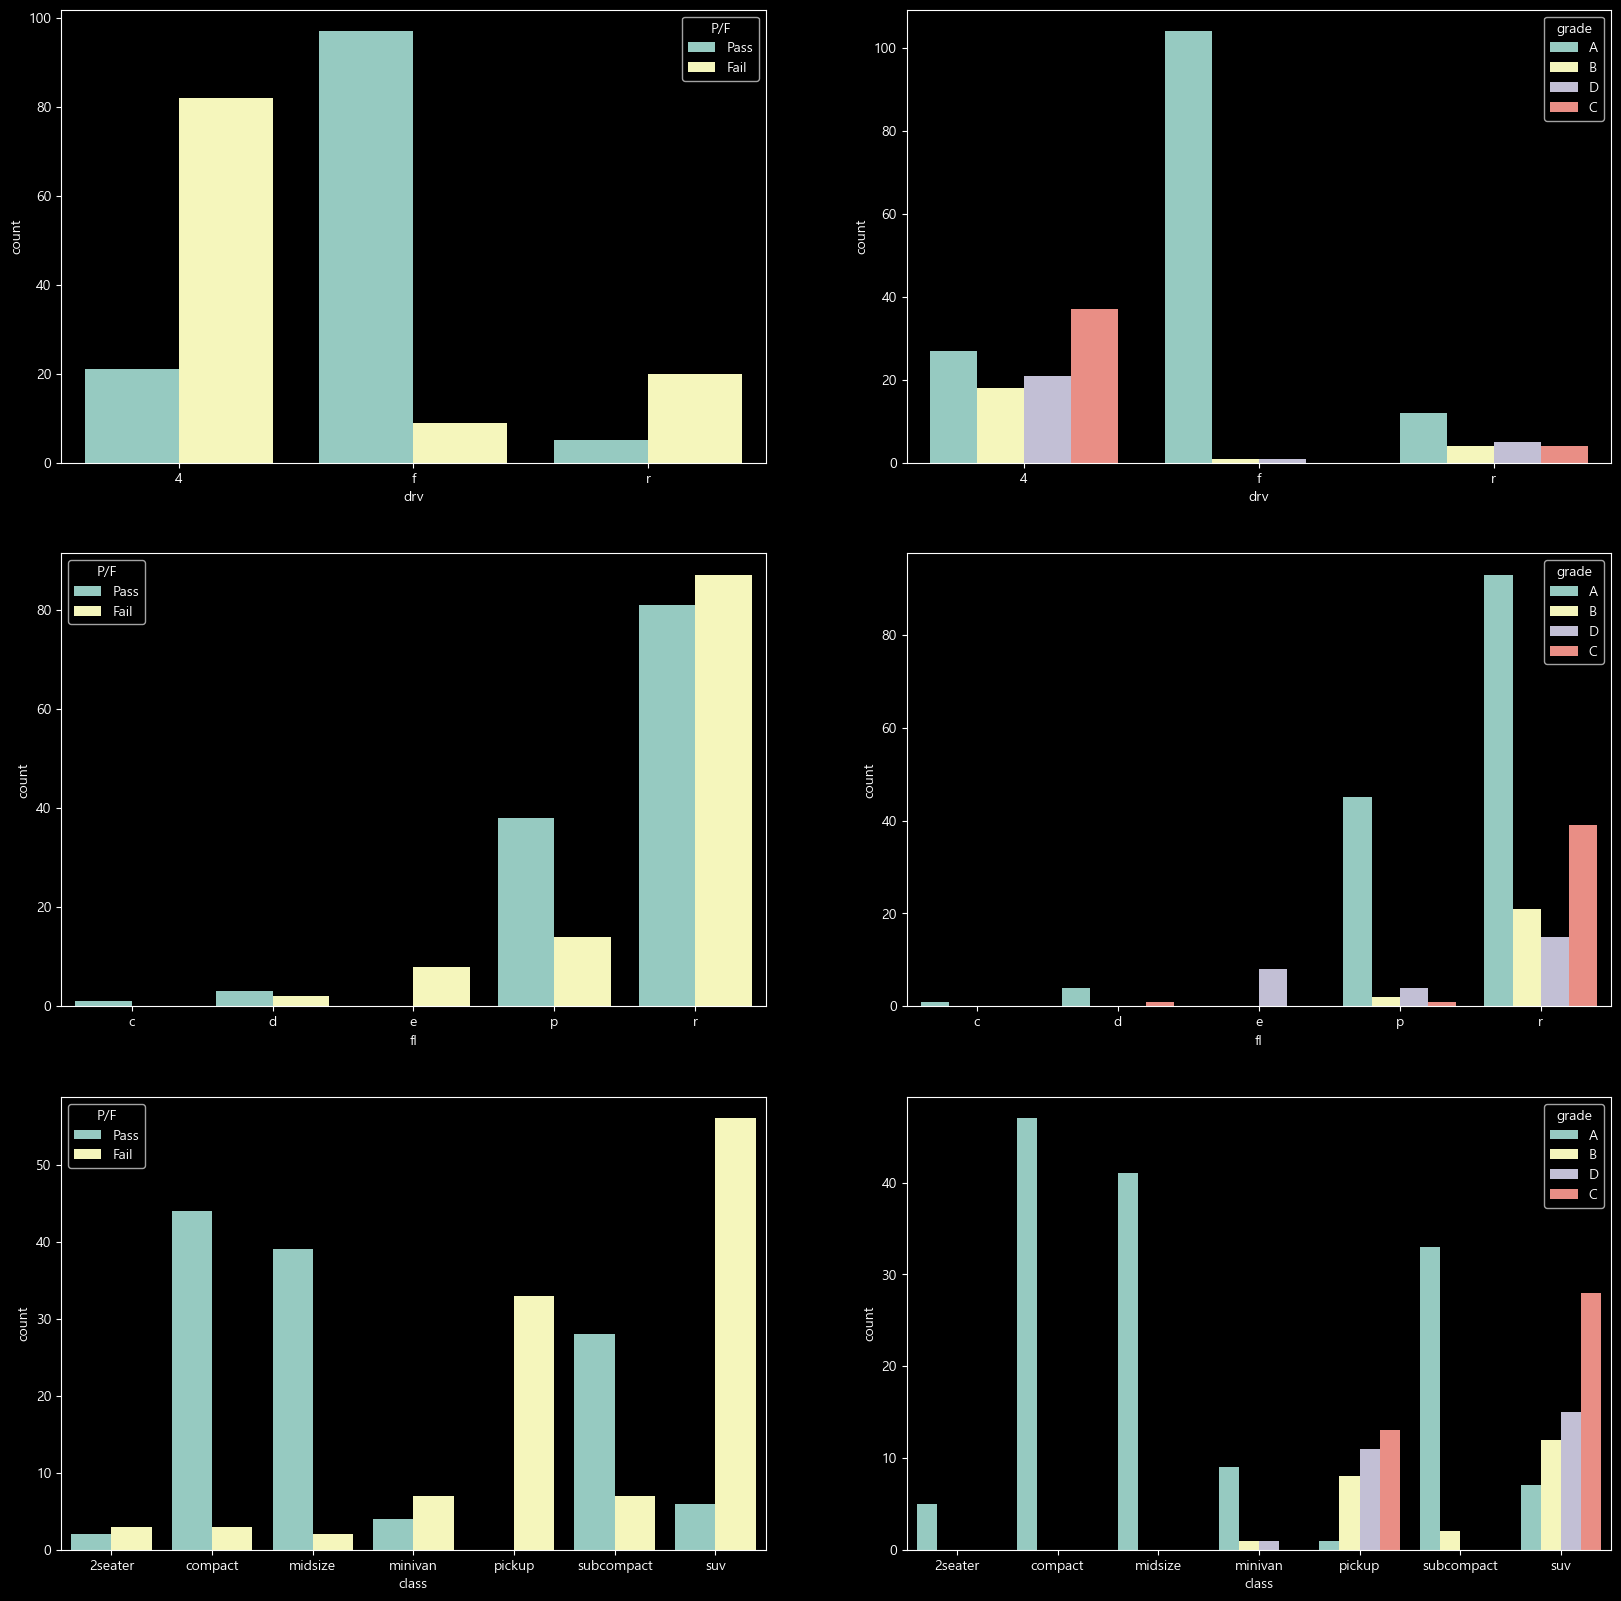

In [20]:
# 선생님 풀이 

fig, ((ax11, ax12), (ax21, ax22), (ax31, ax32)) = plt.subplots(3, 2, figsize=(20, 20))

# 자동차 구동방식별 평가에 대한 빈도
sb.countplot(data=car1, x='drv', hue='P/F', ax=ax11)

# 자동차 구동방식별 등급에 대한 빈도
sb.countplot(data=car1, x='drv', hue='grade', ax=ax12)

# 자동차 연료 종류 평가에 대한 빈도
sb.countplot(data=car1, x='fl', hue='P/F', ax=ax21)

# 자동차 연료 종류 등급에 대한 빈도
sb.countplot(data=car1, x='fl', hue='grade', ax=ax22)

# 자동차 분류별 평가에 대한 빈도
sb.countplot(data=car1, x='class', hue='P/F', ax=ax31)

# 자동차 분류별 등급에 대한 빈도
sb.countplot(data=car1, x='class', hue='grade', ax=ax32)

plt.show()
plt.close()